   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

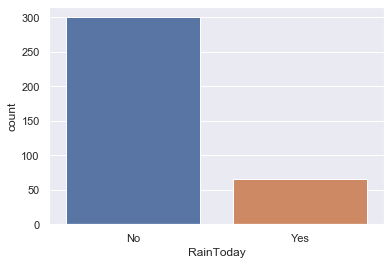

In [189]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


#enter dataset
dataset = pd.read_csv("weather.csv")
print(dataset.head(5))
print(dataset.shape)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                             'Pressure9am','Temp9am','Temp3pm','RISK_MM','RainTomorrow','WindSpeed3pm'], axis = 1) 


clean_data_1["AvgHum"] = clean_data_1[['Humidity3pm','Humidity9am']].mean(axis=1)
clean_data_1["Cloud_cover"] = clean_data_1[['Cloud9am','Cloud3pm']].mean(axis=1)

clean_data_1.loc[clean_data_1['AvgHum'] < 45, 'AvgHum'] = 0
clean_data_1.loc[clean_data_1['AvgHum'] > 45, 'AvgHum'] = 1
clean_data_1.loc[clean_data_1['AvgHum'] == 45, 'AvgHum'] = 1

print(clean_data_1)
clean_data_1.to_csv('multi_test.csv')

#Analyzing Data
sns.countplot(x="RainToday", data=clean_data_1)

# statistical parameters
stats = clean_data_1.describe()
print(stats)

In [190]:
clean_data_1

,MinTemp,MaxTemp,Rainfall,Evaporation,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,AvgHum,Cloud_cover
0,8.0,24.3,0.0,3.4,68,29,1015.0,7,7,No,1.0,7.0
1,14.0,26.9,3.6,4.4,80,36,1008.4,5,3,Yes,1.0,4.0
2,13.7,23.4,3.6,5.8,82,69,1007.2,8,7,Yes,1.0,7.5
3,13.3,15.5,39.8,7.2,62,56,1007.0,2,7,Yes,1.0,4.5
4,7.6,16.1,2.8,5.6,68,49,1018.5,7,7,Yes,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,38,15,1010.8,1,3,No,0.0,2.0
362,7.1,28.4,0.0,11.6,45,22,1016.9,0,1,No,0.0,0.5
363,12.5,19.9,0.0,8.4,63,47,1022.8,3,2,No,1.0,2.5
364,12.5,26.9,0.0,5.0,69,39,1016.2,6,7,No,1.0,6.5


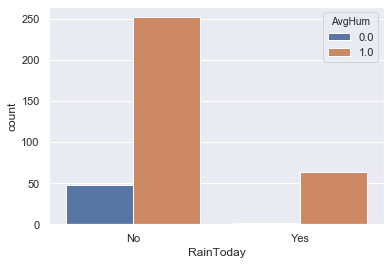

In [191]:
sns.countplot(x='RainToday', hue = 'AvgHum', data = clean_data_1)

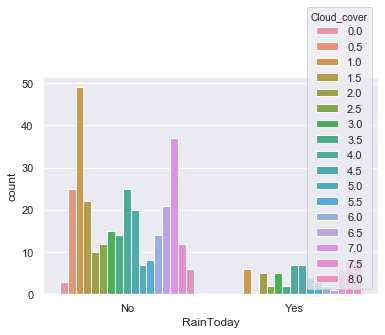

In [192]:
sns.countplot(x='RainToday', hue='Cloud_cover', data = clean_data_1)

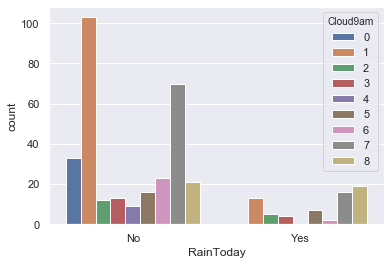

In [193]:
sns.countplot(x='RainToday', hue='Cloud9am', data = clean_data_1)

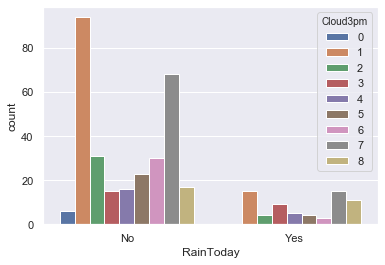

In [194]:
sns.countplot(x='RainToday', hue='Cloud3pm', data = clean_data_1)

In [195]:
clean_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
MinTemp        366 non-null float64
MaxTemp        366 non-null float64
Rainfall       366 non-null float64
Evaporation    366 non-null float64
Humidity9am    366 non-null int64
Humidity3pm    366 non-null int64
Pressure3pm    366 non-null float64
Cloud9am       366 non-null int64
Cloud3pm       366 non-null int64
RainToday      366 non-null object
AvgHum         366 non-null float64
Cloud_cover    366 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.4+ KB


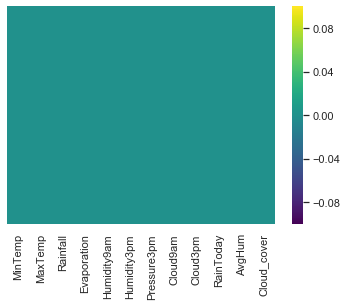

In [196]:
sns.heatmap(clean_data_1.isnull(), yticklabels=False, cmap="viridis")

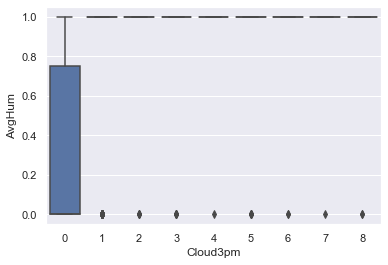

In [197]:
sns.boxplot(x="Cloud3pm", y="AvgHum", data=clean_data_1)

In [198]:
clean_data_1.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Humidity9am    0
Humidity3pm    0
Pressure3pm    0
Cloud9am       0
Cloud3pm       0
RainToday      0
AvgHum         0
Cloud_cover    0
dtype: int64

In [199]:
RainToday1 = pd.get_dummies(clean_data_1['RainToday'], drop_first=True)
RainToday1.head(6)

,Yes
0,0
1,1
2,1
3,1
4,1
5,0


In [200]:
AvgHum1 = pd.get_dummies(clean_data_1['AvgHum'], drop_first=True)
AvgHum1.head(6)

,1.0
0,1
1,1
2,1
3,1
4,1
5,1


In [201]:
Cloud_cover1 = pd.get_dummies(clean_data_1['Cloud_cover'], drop_first=True)
Cloud_cover1.head(6)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [202]:
clean_data_1 = pd.concat([clean_data_1,RainToday1,Cloud_cover1,AvgHum1],axis=1)

clean_data_1.drop('RainToday',axis=1,inplace=True)
clean_data_1.drop('Rainfall',axis=1,inplace=True)
clean_data_1.drop('Cloud9am',axis=1,inplace=True)
clean_data_1.drop('Cloud3pm',axis=1,inplace=True)
clean_data_1.drop('Cloud_cover',axis=1,inplace=True)
clean_data_1.drop('AvgHum',axis=1,inplace=True)
clean_data_1.head(5)
clean_data_1.to_csv('multi_test_1234.csv')

In [203]:
clean_data_1

,MinTemp,MaxTemp,Evaporation,Humidity9am,Humidity3pm,Pressure3pm,Yes,0.5,1.0,1.5,...,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,1.0
0,8.0,24.3,3.4,68,29,1015.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14.0,26.9,4.4,80,36,1008.4,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13.7,23.4,5.8,82,69,1007.2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,13.3,15.5,7.2,62,56,1007.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,7.6,16.1,5.6,68,49,1018.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,38,15,1010.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,7.1,28.4,11.6,45,22,1016.9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
363,12.5,19.9,8.4,63,47,1022.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
364,12.5,26.9,5.0,69,39,1016.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [204]:
X = clean_data_1.drop("Yes",axis=1)
Y = clean_data_1["Yes"]

In [205]:
x = sm.add_constant(X)
reg_log = sm.Logit(Y,X)
results_log = reg_log.fit()
#regression summary
results_log.summary()

         Current function value: inf
         Iterations: 35


C:\Users\DEEP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversion

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  366
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           22
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:                     inf
Time:                        01:00:49   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MinTemp         0.3953      0.078      5.098      0.000       0.243       0.547
MaxTemp        -0.2635      0.068     -3.897      0.000      -0.396      -0.131
Evaporation    -0.1305      0.096     -1.359      0.174      -0.319       0.058
Humidity9am     0.0662      0.022      3.078      0.002       0.024       0.108
Humidity3pm     0.0124      0.021      0.587      0.557      -0.029       0.054
Pressure3pm    -0.1103      0.032     -3.489      0.000      -0.172      -0.048
0.5            97.3429    280.393      0.347      0.728    -452.217     646.903
1.0           108.6275     32.322      3.361      0.001      45.277     171.978
1.5            -5.1718   4.49e+24  -1.15e-24      1.000   -8.81e+24    8.81e+24
2.0           109.7398     32.272      3.400      0.001      46.488     172.992
2.5           108.9621     32.380      3.365      0.001      45.499     172.425
3.0           109.2756     32.324      3.381      0.001      45.923     172.629
3.5           108.0730     32.266      3.349      0.001      44.833     171.313
4.0           108.7912     32.325      3.366      0.001      45.436     172.147
4.5           108.1059     32.206      3.357      0.001      44.984     171.228
5.0           108.5866     32.224      3.370      0.001      45.429     171.744
5.5           108.5225     32.378      3.352      0.001      45.062     171.983
6.0           106.7076     32.177      3.316      0.001      43.642     169.773
6.5           105.6331     32.294      3.271      0.001      42.339     168.928
7.0           106.3042     32.216      3.300      0.001      43.163     169.446
7.5           106.7385     32.303      3.304      0.001      43.426     170.051
8.0           106.2843     32.371      3.283      0.001      42.838     169.730
1.0            -0.3350      0.929     -0.361      0.718      -2.155       1.486
===============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [206]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.01, 0.69, 0.51, 0.85, 0.04, 0.02, 0.06, 0.01, 0.02, 0.15, 0.00,
       0.00, 0.00, 0.09, 0.00, 0.00, 0.01, 0.08, 0.09, 0.00, 0.20, 0.82,
       0.69, 0.09, 0.48, 0.47, 0.07, 0.02, 0.12, 0.35, 0.71, 0.60, 0.49,
       0.47, 0.66, 0.22, 0.21, 0.57, 0.07, 0.04, 0.09, 0.06, 0.03, 0.00,
       0.02, 0.83, 0.27, 0.00, 0.12, 0.63, 0.58, 1.00, 0.25, 0.40, 0.18,
       0.04, 0.05, 0.47, 0.08, 0.02, 0.00, 0.00, 0.00, 0.12, 0.04, 0.15,
       0.25, 0.09, 0.38, 0.34, 0.06, 0.00, 0.25, 0.37, 0.16, 0.20, 0.02,
       0.37, 0.13, 0.91, 0.87, 0.64, 0.00, 0.07, 0.02, 0.05, 0.21, 0.17,
       0.00, 0.14, 0.07, 0.11, 0.26, 0.20, 0.03, 0.83, 0.85, 0.82, 0.55,
       0.43, 0.16, 0.17, 0.21, 0.44, 0.71, 0.08, 0.12, 0.08, 0.12, 0.07,
       0.00, 0.14, 0.53, 0.60, 0.32, 0.00, 0.21, 0.13, 0.21, 0.67, 0.23,
       0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.01, 0.07, 0.00, 0.03, 0.00,
       0.04, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.20, 0.02, 0.49, 0.14,
       0.03, 0.67, 0.92, 0.81, 0.00, 0.37, 0.20, 0.

In [207]:
results_log.pred_table()

array([[283.00, 17.00],
       [33.00, 33.00]])

In [208]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,283.0,17.0
Actual 1,33.0,33.0


In [209]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print(accuracy_train*100)

86.33879781420765


In [210]:
# Load the test dataset
test = pd.read_csv('test_data_log_regression_c.csv')
test

,MinTemp,MaxTemp,Evaporation,Humidity9am,Humidity3pm,Pressure3pm,Yes,1,1.5,2,...,4,4.5,5,5.5,6,6.5,7,7.5,8,1.1
0,8.0,24.3,3.4,68,29,1015.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14.0,26.9,4.4,80,36,1008.4,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13.7,23.4,5.8,82,69,1007.2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,13.3,15.5,7.2,62,56,1007.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,7.6,16.1,5.6,68,49,1018.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,6.2,16.9,5.8,70,57,1021.7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,6.1,18.2,4.2,63,47,1022.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,8.3,17.0,5.6,65,57,1024.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,8.8,19.5,4.0,70,48,1022.7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,8.4,22.8,5.4,82,32,1020.7,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [211]:
X

,MinTemp,MaxTemp,Evaporation,Humidity9am,Humidity3pm,Pressure3pm,0.5,1.0,1.5,2.0,...,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,1.0
0,8.0,24.3,3.4,68,29,1015.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14.0,26.9,4.4,80,36,1008.4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13.7,23.4,5.8,82,69,1007.2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,13.3,15.5,7.2,62,56,1007.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,7.6,16.1,5.6,68,49,1018.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,38,15,1010.8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
362,7.1,28.4,11.6,45,22,1016.9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,12.5,19.9,8.4,63,47,1022.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
364,12.5,26.9,5.0,69,39,1016.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
